In [1]:
from qiskit import QuantumCircuit, execute, Aer, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit.circuit.library.arithmetic.adders.cdkm_ripple_carry_adder import CDKMRippleCarryAdder
from qiskit.quantum_info.operators import Operator
from cmath import exp
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import QFT
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram
import networkx as nx
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from math import log, ceil
import numpy as np

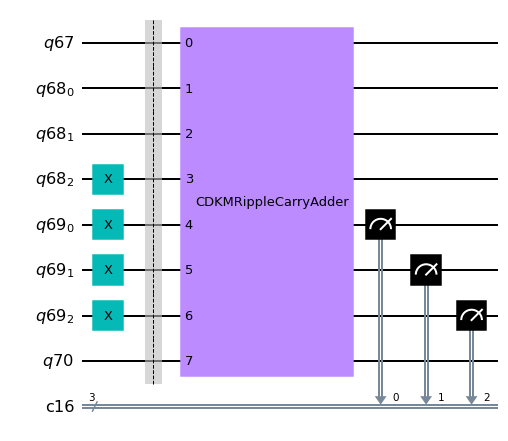

In [19]:
ancilla1 = QuantumRegister(1)
input = QuantumRegister(3)
output = QuantumRegister(3)
ancilla2 = QuantumRegister(1)
read = ClassicalRegister(3)
qc = QuantumCircuit(ancilla1, input, output, ancilla2, read)

qc.x(3)
qc.x([4,5,6])

qc.barrier()

rca = CDKMRippleCarryAdder(3)
qc.append(rca, [0,1,2,3,4,5,6,7])

qc.measure((4,5,6), (0,1,2))

qc.draw('mpl')

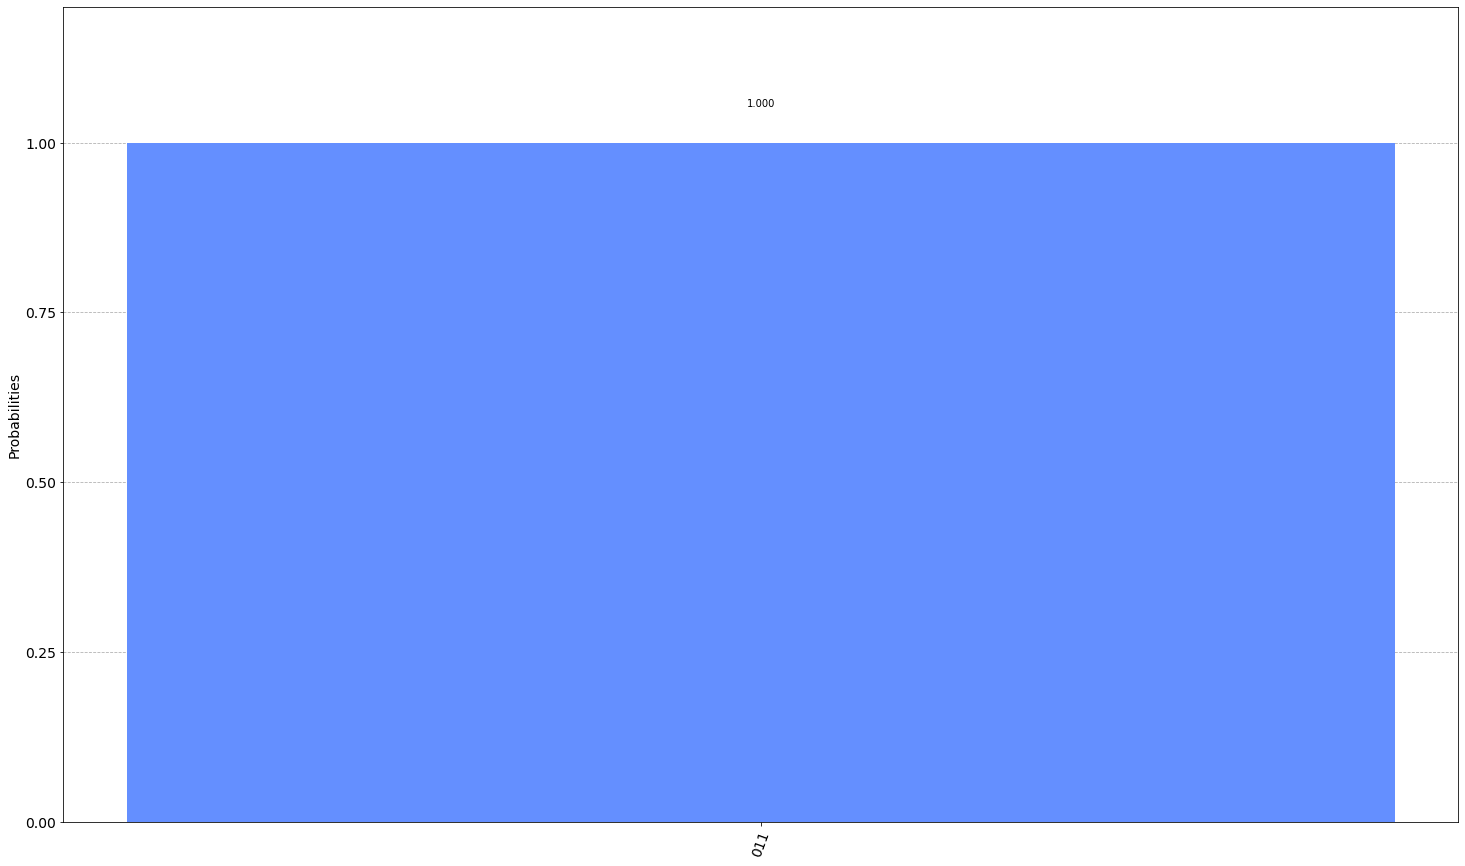

In [20]:
backend = Aer.get_backend('qasm_simulator')
backend.shots = 512

test = transpile(qc, backend)
qobj = assemble(test)
counts = backend.run(qobj, seed_simulator=10).result().get_counts()

plot_histogram(counts,figsize=(25, 15))